In [359]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy

eps = 1.e-30
ft_scale = 16

# Either
# HIGH_PASS
# or
# LOW_PASS
filter_type = "HIGH_PASS"

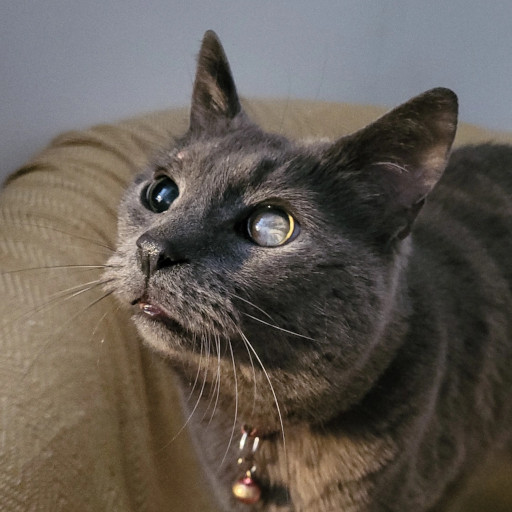

In [360]:
image = np.array(Image.open('pops_512.jpg'))
img = Image.fromarray(image, mode='RGB')
display(img)
img.save("output/pops.png")

r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

In [361]:
def prepare(arr, sf=1):
    return np.clip(arr * sf, 0, 255).astype(np.uint8)

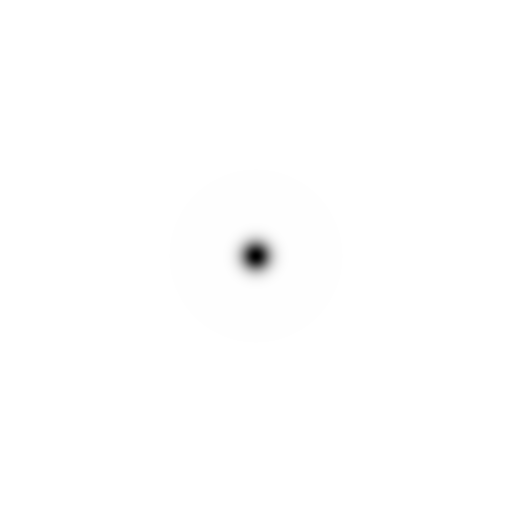

In [362]:
st_dev = 10 if filter_type == "HIGH_PASS" else 20
gauss_window = scipy.signal.windows.gaussian(image.shape[0], st_dev)

gaussian = gauss_window[:, np.newaxis] @ gauss_window[np.newaxis, :]

# can modify the gaussian for different results
# gaussian = gaussian + 1e-3

gaussian /= np.max(gaussian)

if (filter_type == "HIGH_PASS"):
    gaussian = 1 - gaussian

display(Image.fromarray(prepare(gaussian * 255), mode="L"))

In [363]:
F_r = np.fft.fftshift(np.fft.fft2(r))
F_g = np.fft.fftshift(np.fft.fft2(g))
F_b = np.fft.fftshift(np.fft.fft2(b))

F_r_filt = F_r * gaussian
F_g_filt = F_g * gaussian
F_b_filt = F_b * gaussian

r_filt = np.fft.ifft2(np.fft.ifftshift(F_r_filt)).real
g_filt = np.fft.ifft2(np.fft.ifftshift(F_g_filt)).real
b_filt = np.fft.ifft2(np.fft.ifftshift(F_b_filt)).real

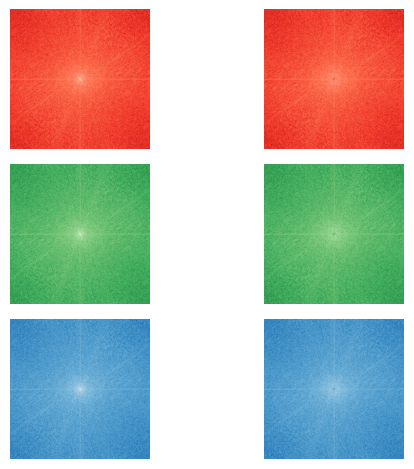

In [364]:
fig, axs = plt.subplots(3, 2)

fig.patch.set_visible(False)

for ax in axs.ravel():
    ax.axis('off')


axs[0, 0].imshow(prepare(np.log(np.abs(F_r.real)), sf=15), cmap='Reds_r', vmin = 0, vmax = 255)
axs[0, 1].imshow(prepare(np.log(np.abs(F_r_filt.real + eps)), sf=15), cmap='Reds_r', vmin = 0, vmax = 255)
axs[1, 0].imshow(prepare(np.log(np.abs(F_g.real)), sf=15), cmap='Greens_r', vmin = 0, vmax = 255)
axs[1, 1].imshow(prepare(np.log(np.abs(F_g_filt.real + eps)), sf=15), cmap='Greens_r', vmin = 0, vmax = 255)
axs[2, 0].imshow(prepare(np.log(np.abs(F_b.real)), sf=15), cmap='Blues_r', vmin = 0, vmax = 255)
axs[2, 1].imshow(prepare(np.log(np.abs(F_b_filt.real + eps)), sf=15), cmap='Blues_r', vmin = 0, vmax = 255)

plt.tight_layout()
plt.show()

# this plot isn't great, the RGB one at the bottom is better

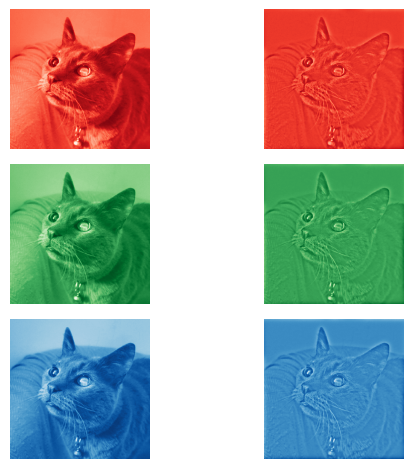

In [365]:
fig, axs = plt.subplots(3, 2)

fig.patch.set_visible(False)

for ax in axs.ravel():
    ax.axis('off')

axs[0, 0].imshow(r, cmap='Reds_r')
axs[0, 1].imshow(r_filt, cmap='Reds_r')
axs[1, 0].imshow(g, cmap='Greens_r')
axs[1, 1].imshow(g_filt, cmap='Greens_r')
axs[2, 0].imshow(b, cmap='Blues_r')
axs[2, 1].imshow(b_filt, cmap='Blues_r')

plt.tight_layout()
plt.show()

/var/folders/h3/rhgxf73j6bs8tprtj4q3215m0000gn/T/ipykernel_6042/597555112.py:2: RuntimeWarning: divide by zero encountered in log
  fft_filt = prepare(np.log(np.abs(np.dstack((F_r_filt, F_g_filt, F_b_filt)))), sf=15)


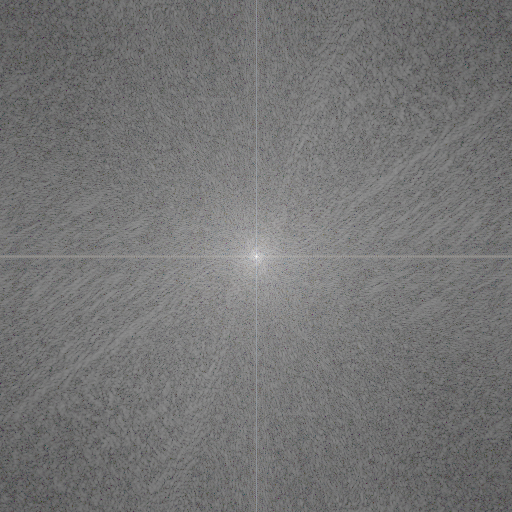

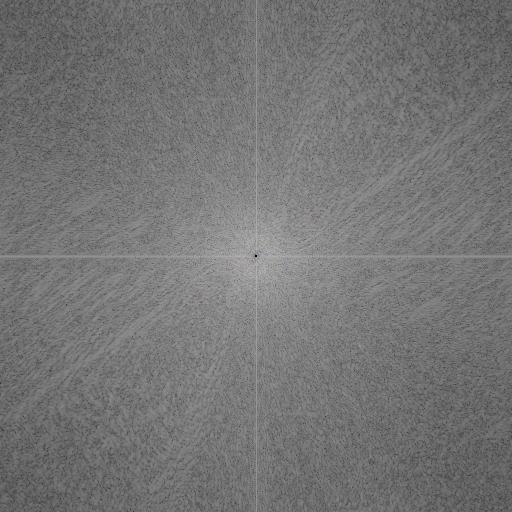

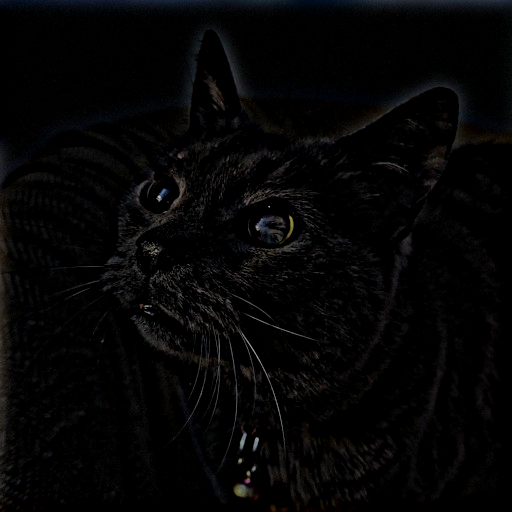

In [366]:
fft_orig = prepare(np.log(np.abs(np.dstack((F_r, F_g, F_b)))), sf=15)
fft_filt = prepare(np.log(np.abs(np.dstack((F_r_filt, F_g_filt, F_b_filt)))), sf=15)
image_filt = prepare(np.dstack((r_filt, g_filt, b_filt)))

img = Image.fromarray(fft_orig, mode='RGB')
display(img)
img.save("output/pops_fft.png")

img = Image.fromarray(fft_filt, mode='RGB')
display(img)
img.save(f"output/pops_{filter_type.lower()}_gauss_fft.png")

img = Image.fromarray(image_filt, mode='RGB')
display(img)
img.save(f"output/pops_{filter_type.lower()}_gauss.png")